### Intro to concepts

https://scipy-lectures.org/packages/scikit-image/index.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

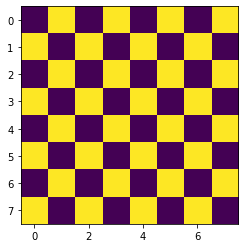

In [2]:
check = np.zeros((8, 8))
check[::2, 1::2] = 1
check[1::2, ::2] = 1

plt.imshow(check) #display data as image

In [3]:
import skimage
from skimage import data  # most functions are in subpackages
#Most scikit-image functions take NumPy ndarrays as arguments
from skimage import filters

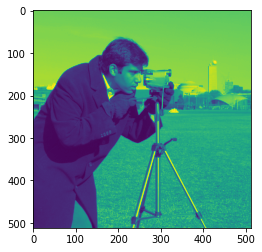

In [5]:
data.camera() #esta en formato de numpy array
camera=data.camera()
type(camera) #numpy.ndarray
camera.dtype #dtype('uint8')

plt.imshow(camera)

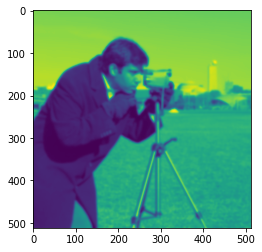

In [26]:
filtered_camera = filters.gaussian(camera, sigma=2)
plt.imshow(filtered_camera) #blur image

### Import and output images

In [8]:
from skimage import io
import os

(140, 568, 3)

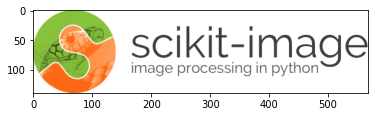

In [46]:
#importar de url
logo = io.imread('http://scikit-image.org/_static/img/logo.png')
plt.imshow(logo)
logo.shape #rgb

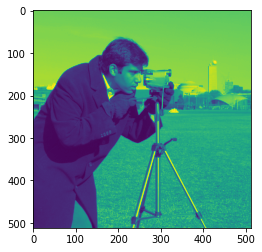

In [11]:
#importar
filename = os.path.join(skimage.data_dir, 'camera.png')

#hacer que se pueda leer
camera = io.imread(filename)

#print
plt.imshow(camera)

In [12]:
#save image
io.imsave('local_logo.png', logo)

### Filter and multiply

255

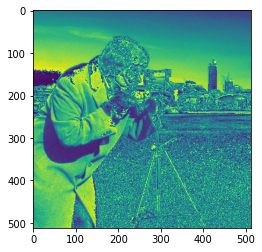

In [18]:
camera_multiply=7*camera
plt.imshow(camera_multiply)
camera.shape #512*512
camera.dtype #dtype('uint8') 8 bit unsigned integer
#unsigned, only positive


In [19]:
#turn image into float
from skimage import img_as_float


In [39]:
camera_float = img_as_float(camera)
print(camera.max(), camera_float.max())
print(camera.min(), camera_float.min())
#https://scikit-image.org/docs/stable/user_guide/data_types.html


255 1.0
0 0.0


0.6447887988758096 0.7686274509803921 0.834313725490196


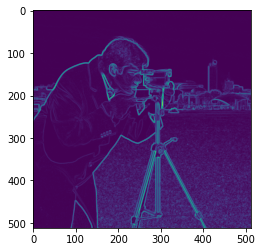

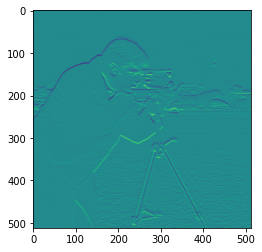

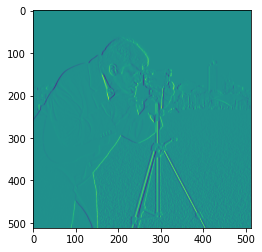

In [38]:
camera_sobel = filters.sobel(camera)
camera_sobelh = filters.sobel_h(camera)
camera_sobelv = filters.sobel_v(camera)
print(camera_sobel.max(),camera_sobelh.max(),camera_sobelv.max())
plt.imshow(camera_sobel)
plt.show()
plt.imshow(camera_sobelh)
plt.show()
plt.imshow(camera_sobelv)
plt.show()


### RGB pictures

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

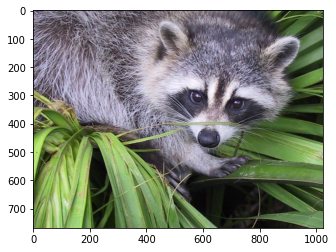

In [44]:
import scipy
face = scipy.misc.face()
face.shape #(768, 1024, 3)
plt.imshow(face)
face

### Local Filters

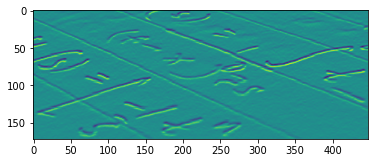

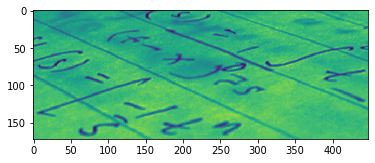

In [49]:
text = data.text()
hsobel_text = filters.sobel_h(text)
plt.imshow(hsobel_text)
plt.show()
plt.imshow(text)

### Non Local filters

In [50]:
from skimage import exposure

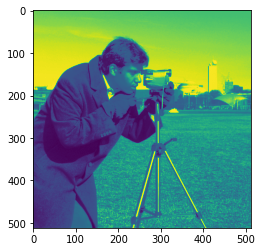

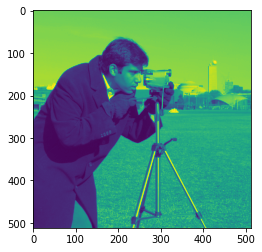

In [53]:
camera_equalized = exposure.equalize_hist(camera)
plt.imshow(camera_equalized)
plt.show()
plt.imshow(camera)

### Mathematical Morphology

In [61]:
from skimage import morphology

In [65]:
morphology.diamond(1)

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [66]:
#Erosion
a = np.zeros((7,7), dtype=np.uint8)
a[1:6, 2:5] = 1
print(a)
print(morphology.binary_erosion(a, morphology.diamond(1)).astype(np.uint8))

#Erosion removes objects smaller than the structure
print(morphology.binary_erosion(a, morphology.diamond(2)).astype(np.uint8))

[[0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [67]:
#Dilation: maximum filter
a = np.zeros((5, 5))
a[2, 2] = 1
print(a)
morphology.binary_dilation(a, morphology.diamond(1)).astype(np.uint8)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

In [68]:
#Opening:erosion+dilation
#Opening removes small objects and smoothes corners.
a = np.zeros((5,5), dtype=np.int)
a[1:4, 1:4] = 1; a[4, 4] = 1
print(a)
morphology.binary_opening(a, morphology.diamond(1)).astype(np.uint8)

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 1]]


C:\Users\gabri\AppData\Local\Temp\ipykernel_2432\2870198431.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.zeros((5,5), dtype=np.int)


array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint8)

### Denoising

In [69]:
from skimage.morphology import disk
from skimage import restoration

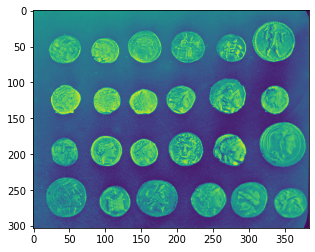

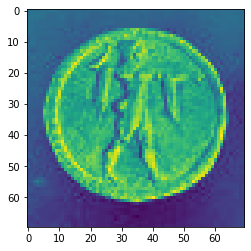

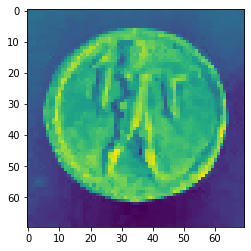

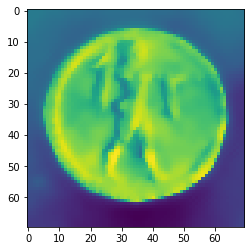

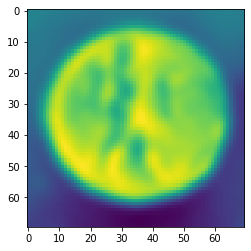

In [82]:
coins = data.coins()
plt.imshow(coins)
plt.show()

coins_zoom = coins[10:80, 300:370] #zoom
plt.imshow(coins_zoom)
plt.show()

median_coins = filters.median(coins_zoom, disk(1))
plt.imshow(median_coins) #media
plt.show()

tv_coins = restoration.denoise_tv_chambolle(coins_zoom, weight=0.1)
plt.imshow(tv_coins) #denoise tv
plt.show()

gaussian_coins = filters.gaussian(coins_zoom, sigma=2)
plt.imshow(gaussian_coins) #gaussian blur
plt.show()



### Image Segmentation

In [83]:
from skimage import data
from skimage import filters

#### Threshold

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


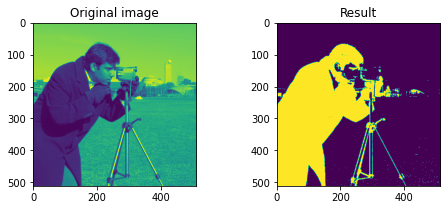

In [89]:
#Histogram-based method: Otsu thresholding
val = filters.threshold_otsu(camera)
mask = camera < val

fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()

ax[0].imshow(camera)
ax[0].set_title('Original image')

ax[1].imshow(mask)
ax[1].set_title('Result')

print(mask)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


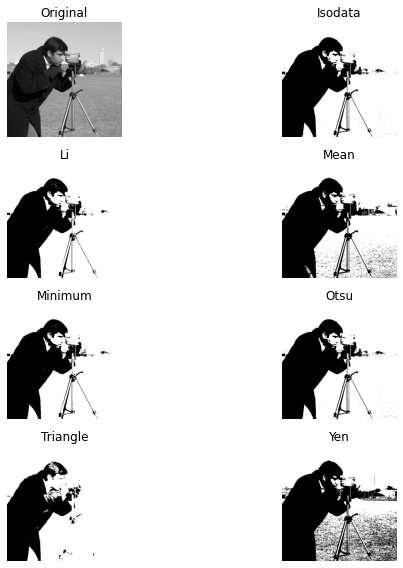

In [95]:
#to try best threshold method
#this is based on the mean value of pixel intensities
#https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(camera, figsize=(10, 8), verbose=2)
plt.show()

#### Labeling connected components of a discrete image

C:\Users\gabri\AppData\Local\Temp\ipykernel_2432\2392983742.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1


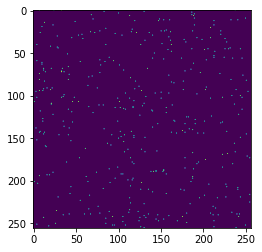

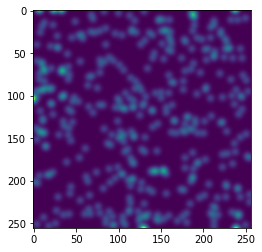

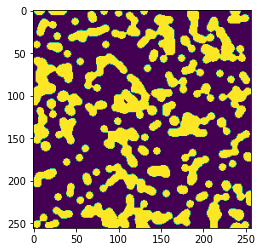

In [99]:
#Creating a syntethic image
n = 20
l = 256
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1

plt.imshow(im)
plt.show()

im = filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()

plt.imshow(im)
plt.show()

plt.imshow(blobs)
plt.show()

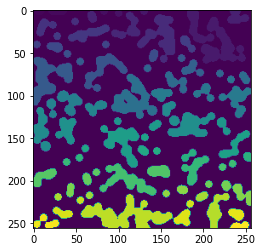

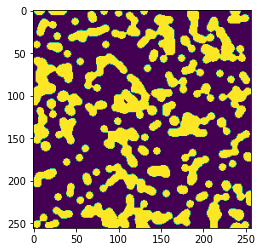

[[ 1  1  1 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 0 79 79 ... 81  0  0]
 [ 0 79 79 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[ 1  1  1 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 ...
 [ 0 79 79 ... 81  0  0]
 [ 0 79 79 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [105]:
#Label only foreground connected components:
from skimage import measure

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.imshow(all_labels)
plt.show()

plt.imshow(blobs)
plt.show()

print(all_labels)
print(blobs_labels)

#### Recognize the coin

In [112]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu, threshold_li
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = data.coins()[50:-50, 50:-50]


(203, 284)

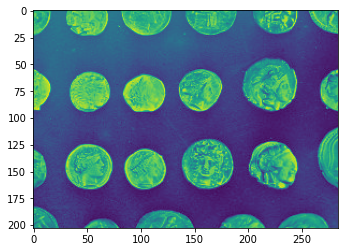

In [109]:
plt.imshow(image)
image.shape

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


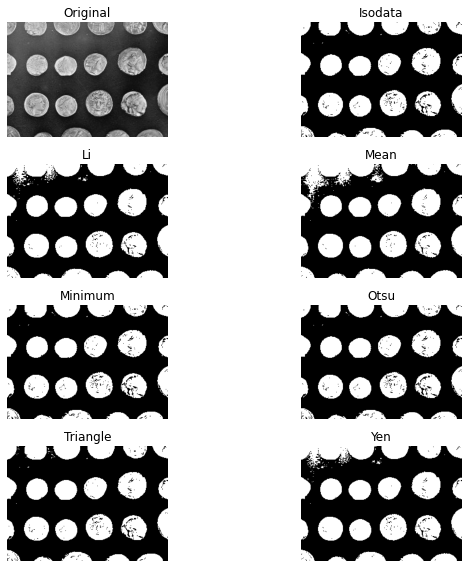

In [110]:
#trying the thresholds
fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=2)
plt.show()

Text(0.5, 1.0, 'Closed')

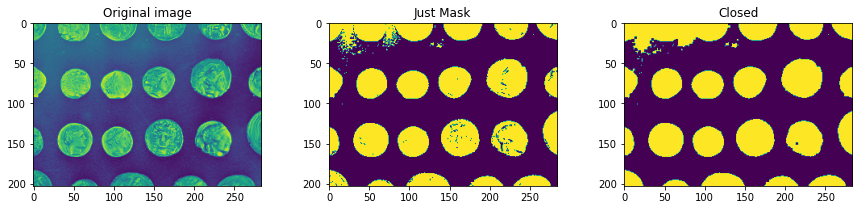

In [116]:
# apply threshold
thresh = threshold_li(image)
mask=image > thresh
bw = closing(image > thresh, square(3))

fig, axes = plt.subplots(ncols=3, figsize=(15, 3))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title('Original image')

ax[1].imshow(mask)
ax[1].set_title('Just Mask')

ax[2].imshow(bw)
ax[2].set_title('Closed')

Text(0.5, 1.0, 'Cleared')

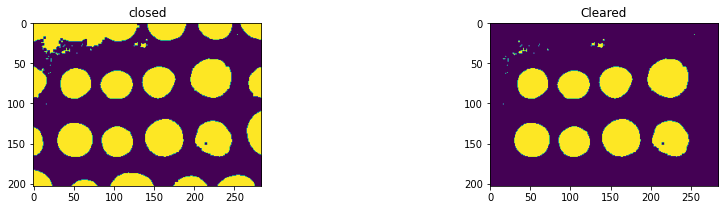

In [117]:
# remove artifacts connected to image border
cleared = clear_border(bw)
fig, axes = plt.subplots(ncols=2, figsize=(15, 3))
ax = axes.ravel()

ax[0].imshow(bw)
ax[0].set_title('closed')

ax[1].imshow(cleared)
ax[1].set_title('Cleared')

Text(0.5, 1.0, 'Cleared')

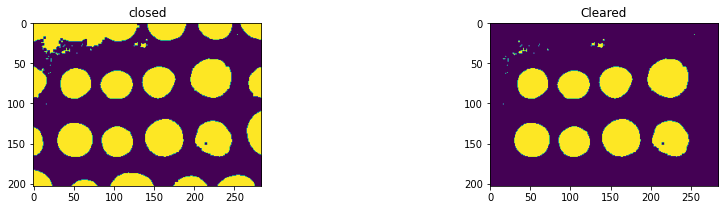

In [121]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 3))
ax = axes.ravel()

ax[0].imshow(bw)
ax[0].set_title('closed')

ax[1].imshow(cleared)
ax[1].set_title('Cleared')



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]


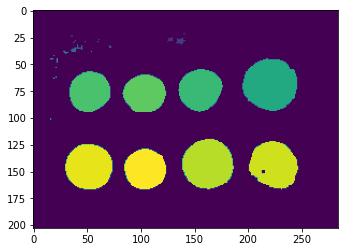

In [149]:
# label image regions
label_image = label(cleared)

print(np.unique(label_image))
plt.imshow(label_image)

(203, 284, 3)

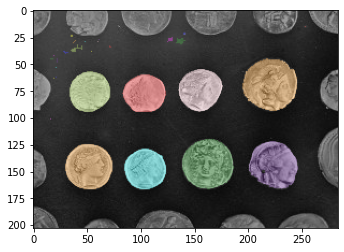

In [160]:
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image,image=image,bg_label=0)
plt.imshow(image_label_overlay)
image_label_overlay.shape

In [170]:
for region in regionprops(label_image):
    print("Label:",region.label," - Area:",region.area," -  Box around the area:",region.bbox) #Tells us the label and the area 

#We want just the coins and those are larger than 1000

Label: 1  - Area: 1  -  Box around the area: (15, 253, 16, 254)
Label: 2  - Area: 4  -  Box around the area: (21, 140, 23, 142)
Label: 3  - Area: 4  -  Box around the area: (23, 35, 25, 37)
Label: 4  - Area: 14  -  Box around the area: (25, 125, 30, 130)
Label: 5  - Area: 32  -  Box around the area: (26, 133, 32, 142)
Label: 6  - Area: 1  -  Box around the area: (27, 61, 28, 62)
Label: 7  - Area: 3  -  Box around the area: (28, 37, 31, 40)
Label: 8  - Area: 1  -  Box around the area: (29, 48, 30, 49)
Label: 9  - Area: 1  -  Box around the area: (29, 60, 30, 61)
Label: 10  - Area: 27  -  Box around the area: (32, 35, 39, 46)
Label: 11  - Area: 3  -  Box around the area: (33, 71, 35, 73)
Label: 12  - Area: 7  -  Box around the area: (38, 28, 41, 33)
Label: 13  - Area: 1  -  Box around the area: (38, 54, 39, 55)
Label: 14  - Area: 1  -  Box around the area: (42, 19, 43, 20)
Label: 15  - Area: 3  -  Box around the area: (45, 16, 46, 19)
Label: 16  - Area: 4  -  Box around the area: (45, 22

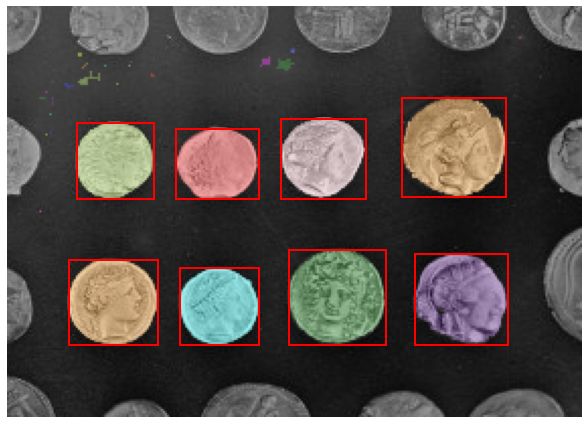

In [172]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

#regionprops=Measure properties of labeled image regions.

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()